# Classification Task
Objective: Predict which loans will default such that a lender can decide which loans to put money in.

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
from datetime import datetime

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 100)

## About

This file contains complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter.

The data dictionary is in an accompanying file titled LCDataDictionary.xlsx

Source: https://www.lendingclub.com/info/download-data.action

In [91]:
loans = pd.read_csv('lending-club-loan-data/loan.csv')
loans.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loans.shape

(887379, 74)

In [92]:
loans.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

There are 74 columns. At a glance, some of the important columns that would help to predict defaults are listed below.

In [8]:
imp_cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'home_ownership', 
           'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 
           'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
           'total_acc', 'acc_now_delinq', 'max_bal_bc','all_util', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m']

Some columns have unstructured text such as `desc` and `emp_title`, while others such as `funded_amnt` are created after the loan has been invested in, a scenario which we do not care about.

#### Task For Students
Explore each variable in the data dictionary and see why or why not it was included.

In [9]:
# subset the original data frame to include the columns mentioned above.
loans_df = loans[imp_cols]
del (loans)

In [10]:
loans_df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m
0,5000.0,36 months,10.65,162.87,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,0.0,NaN,NaN,NaN,NaN,NaN
1,2500.0,60 months,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2400.0,36 months,15.96,84.33,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,0.0,NaN,NaN,NaN,NaN,NaN
3,10000.0,36 months,13.49,339.31,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,0.0,NaN,NaN,NaN,NaN,NaN
4,3000.0,60 months,12.69,67.79,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,other,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,0.0,NaN,NaN,NaN,NaN,NaN


In [11]:
loans_df.shape

(887379, 28)

The number of columns in the data frame have been reduced from the previous 74.

## Feature Engineering
Feature engineering a few variables.

#### Term

In [12]:
loans_df.term.value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

#### Employment Length

In [13]:
loans_df.emp_length.value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
n/a           44825
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

We could leave 'emp_length' as categorical data, but it shouldn't be treated as such or as ordinal data since the intervals are easy to determine. We thus convert it into numerical data.

In [14]:
replace_dict = {'10+ years':10, '2 years':2, '< 1 year':0, '3 years':3, '1 year':1, '5 years':5, '4 years':4, 'n/a':0, 
                '7 years':7, '8 years':8, '6 years':6, '9 years':9}

In [15]:
loans_df.emp_length.replace(replace_dict, inplace=True)

In [16]:
loans_df.emp_length.value_counts()

10    291569
0     115430
2      78870
3      70026
1      57095
5      55704
4      52529
7      44594
8      43955
6      42950
9      34657
Name: emp_length, dtype: int64

#### Home Ownership

In [17]:
loans_df.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

Since there are only a few observations with home ownership ANY, remove those observations.

In [18]:
# Remove observations containing ANY
loans_df = loans_df.query('home_ownership != "ANY"')

In [19]:
loans_df.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
Name: home_ownership, dtype: int64

#### Verification Status

In [20]:
loans_df.verification_status.value_counts()

Source Verified    329556
Verified           291070
Not Verified       266750
Name: verification_status, dtype: int64

#### Credit Line Time
Since the length of time an applicant has a credit history is an important predictor of whether he will default on his loan, we calculate the number of days between the `issue_d` and the `earliest_credit_line`.

In [21]:
loans_df.issue_d.value_counts()

Oct-2015    48631
Jul-2015    45961
Dec-2015    44341
Oct-2014    38782
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Jul-2014    29306
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Nov-2014    25054
Feb-2015    23770
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Dec-2013    15020
Nov-2013    14676
Oct-2013    14114
Sep-2013    12987
Aug-2013    12674
Jul-2013    11910
Jun-2013    10899
Sep-2014    10605
            ...  
Dec-2009      658
Oct-2009      604
Sep-2009      507
Aug-2009      446
Jul-2009      411
Jun-2009      406
Mar-2008      402
May-2009      359
Apr-2009      333
Mar-2009      324
Feb-2008      306
Jan-2008      305
Feb-2009      302
Jan-2009      269
Apr-2008      259
Dec-2008      253
Nov-2008      209
Dec-2007      172
Jul-2008      141
Jun-2008      124
Oct-2008      122
May-2008      115
Nov-2007      112
Oct-2007      105
Aug-2008  

In [22]:
loans_df.earliest_cr_line.value_counts()

Aug-2001    6659
Aug-2000    6529
Oct-2000    6322
Oct-2001    6154
Aug-2002    6086
Sep-2000    5918
Nov-1999    5878
Oct-1999    5824
Nov-2000    5822
Sep-2002    5812
Oct-2002    5684
Sep-2001    5678
Sep-2003    5612
Aug-1999    5598
Sep-1999    5588
Jul-2001    5330
Nov-2001    5223
Oct-2003    5212
Aug-2003    5205
Mar-2001    5173
Sep-1998    5141
Dec-2000    5103
Sep-2004    5075
May-2001    5067
Dec-2001    5046
Dec-1999    5019
Jul-2000    4997
Oct-1998    4946
Jun-2001    4930
Mar-2000    4906
            ... 
Aug-1946       1
Jan-1948       1
Jul-1961       1
Jan-1946       1
Apr-1958       1
May-1957       1
May-1950       1
Dec-1950       1
Dec-1951       1
May-1961       1
Sep-1953       1
Sep-1957       1
Nov-1950       1
Nov-1953       1
Nov-1955       1
Nov-1957       1
Mar-1959       1
Mar-1955       1
Feb-1960       1
Apr-1960       1
Feb-1957       1
Jul-1955       1
Jul-1951       1
Oct-1957       1
Oct-1954       1
Oct-1950       1
Jun-1955       1
Dec-1959      

Since the issue date and the earliest credit line variables are not in date time format, we'll have to convert them to datetime.

In [23]:
loans_df.issue_d = pd.to_datetime(loans_df.issue_d)
loans_df.issue_d.value_counts()

2015-10-01    48631
2015-07-01    45961
2015-12-01    44341
2014-10-01    38782
2015-11-01    37530
2015-08-01    35886
2015-04-01    35427
2015-01-01    35107
2015-05-01    31913
2014-07-01    29306
2015-09-01    28641
2015-06-01    28485
2015-03-01    25400
2014-11-01    25054
2015-02-01    23770
2014-05-01    19099
2014-04-01    19071
2014-08-01    18814
2014-06-01    17179
2014-03-01    16513
2014-01-01    15628
2014-02-01    15269
2013-12-01    15020
2013-11-01    14676
2013-10-01    14114
2013-09-01    12987
2013-08-01    12674
2013-07-01    11910
2013-06-01    10899
2014-09-01    10605
              ...  
2009-12-01      658
2009-10-01      604
2009-09-01      507
2009-08-01      446
2009-07-01      411
2009-06-01      406
2008-03-01      402
2009-05-01      359
2009-04-01      333
2009-03-01      324
2008-02-01      306
2008-01-01      305
2009-02-01      302
2009-01-01      269
2008-04-01      259
2008-12-01      253
2008-11-01      209
2007-12-01      172
2008-07-01      141


In [24]:
loans_df.earliest_cr_line = pd.to_datetime(loans_df.earliest_cr_line)
loans_df.earliest_cr_line.value_counts()

2001-08-01    6659
2000-08-01    6529
2000-10-01    6322
2001-10-01    6154
2002-08-01    6086
2000-09-01    5918
1999-11-01    5878
1999-10-01    5824
2000-11-01    5822
2002-09-01    5812
2002-10-01    5684
2001-09-01    5678
2003-09-01    5612
1999-08-01    5598
1999-09-01    5588
2001-07-01    5330
2001-11-01    5223
2003-10-01    5212
2003-08-01    5205
2001-03-01    5173
1998-09-01    5141
2000-12-01    5103
2004-09-01    5075
2001-05-01    5067
2001-12-01    5046
1999-12-01    5019
2000-07-01    4997
1998-10-01    4946
2001-06-01    4930
2000-03-01    4906
              ... 
1958-04-01       1
1950-05-01       1
1957-11-01       1
1957-10-01       1
1960-04-01       1
1946-08-01       1
1948-01-01       1
1953-09-01       1
1957-02-01       1
1957-09-01       1
1961-07-01       1
1949-06-01       1
1951-07-01       1
1950-11-01       1
1955-07-01       1
1957-05-01       1
1955-06-01       1
1955-08-01       1
1950-10-01       1
1951-12-01       1
1959-12-01       1
1958-03-01  

In [25]:
loans_df['credit_line_days'] = (loans_df['issue_d'] - loans_df['earliest_cr_line']).dt.days

Since we now do not need the `earliest_cr_line` and `issue_d` variables we drop them.

In [26]:
loans_df.drop(axis=1, labels=['earliest_cr_line', 'issue_d'], inplace=True)

#### Loan Status

In [27]:
loans_df.loan_status.value_counts()

Current                                                601777
Fully Paid                                             207722
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [28]:
# consider only loans that are fully paid, charged off or default.
loans_df = loans_df.query('loan_status == "Fully Paid" | loan_status == "Charged Off" | loan_status == "Default"')

In [29]:
loans_df.shape

(254189, 27)

In [30]:
# Replace Default with Charged Off so there are only 2 factors
loans_df.loan_status.replace(inplace=True, to_replace='Default', value='Charged Off')

In [31]:
loans_df.loan_status.value_counts()

Fully Paid     207722
Charged Off     46467
Name: loan_status, dtype: int64

#### Find the number of NA values under each column.

In [32]:
loans_df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq    141446
mths_since_last_record    222375
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                   200
total_acc                      0
acc_now_delinq                 0
max_bal_bc                254045
all_util                  254045
total_rev_hi_lim           63726
inq_fi                    254045
inq_last_12m              254045
credit_line_days               0
dtype: int64

#### Drop columns which have more than 90% NA values.

In [33]:
frac = 0.9

In [34]:
loans_df = loans_df.loc[:, pd.notnull(loans_df).sum() > int(len(loans_df)*(1 - frac))]

In [35]:
loans_df.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,total_rev_hi_lim,credit_line_days
0,5000.0,36 months,10.65,162.87,10,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,0.0,NaN,9830.0
1,2500.0,60 months,15.27,59.83,0,RENT,30000.0,Source Verified,Charged Off,car,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,0.0,NaN,4627.0
2,2400.0,36 months,15.96,84.33,10,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,0.0,NaN,3682.0
3,10000.0,36 months,13.49,339.31,10,RENT,49200.0,Source Verified,Fully Paid,other,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,0.0,NaN,5782.0
5,5000.0,36 months,7.90,156.46,3,RENT,36000.0,Source Verified,Fully Paid,wedding,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963.0,28.3,12.0,0.0,NaN,2586.0


In [36]:
loans_df.shape

(254189, 23)

In [37]:
loans_df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq    141446
mths_since_last_record    222375
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                   200
total_acc                      0
acc_now_delinq                 0
total_rev_hi_lim           63726
credit_line_days               0
dtype: int64

Variables such as `mths_since_last_delinq`, `mths_since_last_record`, `revol_util` and `total_rev_hi_lim` still have `NA` values. These values will be replaced with the mean later.

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(loans_df, test_size=0.30, random_state=1)

In [40]:
train.shape

(177932, 23)

In [41]:
test.shape

(76257, 23)

### Exploratory Data Analysis

In [42]:
# summary of all variables
train.describe(include='all')

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,total_rev_hi_lim,credit_line_days
count,177932.000000,177932,177932.000000,177932.000000,177932.000000,177932,1.779320e+05,177932,177932,177932,177932.000000,177932.000000,177932.000000,79012.000000,22293.000000,177932.000000,177932.000000,1.779320e+05,177799.000000,177932.000000,177932.000000,1.334340e+05,177932.000000
unique,NaN,2,NaN,NaN,NaN,5,NaN,3,2,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36 months,NaN,NaN,NaN,MORTGAGE,NaN,Verified,Fully Paid,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,138106,NaN,NaN,NaN,87694,NaN,65412,145356,104429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13577.736439,NaN,13.783444,418.502925,5.596458,NaN,7.242351e+04,NaN,NaN,NaN,16.572609,0.251186,0.853489,35.148610,75.600368,10.941450,0.143937,1.517452e+04,54.323671,25.023402,0.003007,2.967584e+04,5570.527218
std,8131.892964,NaN,4.402543,244.846162,3.728877,NaN,5.677732e+04,NaN,NaN,NaN,7.803588,0.745382,1.067387,21.816067,29.642850,4.895766,0.436417,1.861705e+04,24.796603,11.752426,0.058810,2.918843e+04,2567.703069
min,500.000000,NaN,5.320000,15.690000,0.000000,NaN,3.000000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000e+00,1095.000000
25%,7350.000000,NaN,10.740000,240.490000,2.000000,NaN,4.500000e+04,NaN,NaN,NaN,10.770000,0.000000,0.000000,17.000000,54.000000,7.000000,0.000000,5.863000e+03,36.300000,16.000000,0.000000,1.330000e+04,3865.000000
50%,12000.000000,NaN,13.550000,365.230000,6.000000,NaN,6.200000e+04,NaN,NaN,NaN,16.220000,0.000000,1.000000,32.000000,78.000000,10.000000,0.000000,1.093600e+04,55.800000,23.000000,0.000000,2.230000e+04,5083.000000
75%,18250.000000,NaN,16.550000,547.550000,10.000000,NaN,8.700000e+04,NaN,NaN,NaN,22.030000,0.000000,1.000000,51.000000,101.000000,14.000000,0.000000,1.908600e+04,73.900000,32.000000,0.000000,3.680000e+04,6820.000000


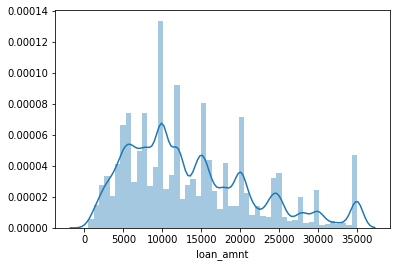

In [43]:
# univariate plot
sns.distplot(train.loan_amnt);

The univariate distribution for the loan amount does not follow a normal distribution.

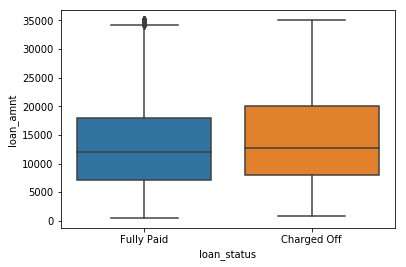

In [44]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data=train);

The median value of loan amount for Charged Off loans is higher.

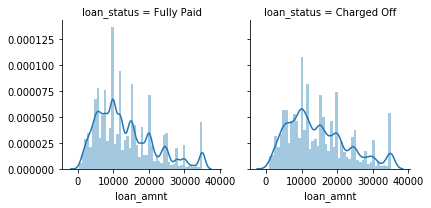

In [45]:
g = sns.FacetGrid(train, col ='loan_status')
g.map(sns.distplot, "loan_amnt");

The loan amount for both the loan statuses follows a roughly similar distribution.

In [46]:
# Create another column called 'default' to help with EDA
train['default'] = np.where(train.loan_status == 'Charged Off', 1, 0)

C:\Users\jashs\Anaconda3\envs\greyatom\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


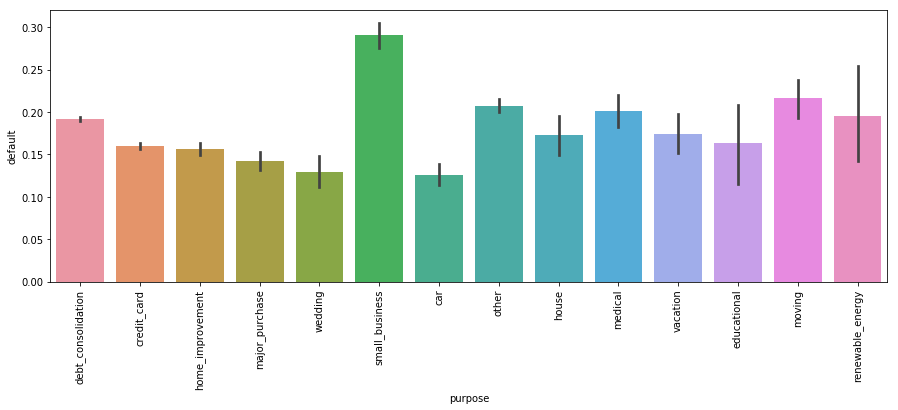

In [47]:
plt.figure(figsize=(15, 5))
sns.barplot(x="purpose", y="default", data=train,estimator=np.mean)
plt.xticks(rotation='vertical');

Small business loans have the highest proportion of defaults while loans for purchasing a car have the lowest.

### Task for Students:
* Explore each variable in the data set further.

In [55]:
X_train = train.drop(axis=1, labels=['loan_status', 'default'])
y_train = train.loan_status

In [56]:
X_train.columns.values

array(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
       'credit_line_days'], dtype=object)

In [57]:
X_train = pd.get_dummies(columns=['term', 'home_ownership', 'verification_status', 'purpose'], data=X_train)

In [58]:
X_train.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,total_rev_hi_lim,credit_line_days,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
216555,25000.0,7.62,779.04,3,143000.00,11.61,0.0,1.0,NaN,NaN,15.0,0.0,22218.0,16.1,44.0,0.0,NaN,11292.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
407269,4900.0,12.99,165.08,8,110000.00,4.46,0.0,1.0,61.0,NaN,10.0,0.0,5075.0,51.8,20.0,0.0,9800.0,5661.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
137471,30175.0,16.29,738.46,7,129965.04,24.37,0.0,0.0,67.0,NaN,15.0,0.0,27513.0,55.4,32.0,0.0,49700.0,5752.0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
333197,16150.0,18.99,591.92,7,45000.00,11.01,0.0,0.0,NaN,NaN,6.0,0.0,12498.0,83.9,7.0,0.0,14900.0,5844.0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
169555,9000.0,10.16,291.09,10,120000.00,9.22,0.0,4.0,28.0,NaN,13.0,0.0,8509.0,67.5,41.0,0.0,12600.0,4598.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train.shape

(177932, 42)

In [62]:
X_test = test.drop(axis=1, labels='loan_status')

In [63]:
X_test.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,total_rev_hi_lim,credit_line_days
851750,8000.0,36 months,8.67,253.18,9,OWN,41000.0,Not Verified,debt_consolidation,29.19,0.0,0.0,NaN,NaN,10.0,0.0,10666.0,33.8,20.0,0.0,31600.0,4263.0
206064,20000.0,36 months,14.33,686.77,3,RENT,98000.0,Not Verified,credit_card,22.14,0.0,0.0,NaN,NaN,13.0,0.0,34824.0,70.8,24.0,0.0,NaN,5752.0
162015,9000.0,36 months,12.12,299.45,6,MORTGAGE,72000.0,Not Verified,credit_card,9.80,0.0,0.0,29.0,NaN,8.0,0.0,8993.0,87.3,18.0,0.0,10300.0,6269.0
188743,27150.0,60 months,10.16,579.00,10,MORTGAGE,85000.0,Verified,home_improvement,9.85,0.0,0.0,NaN,NaN,6.0,0.0,5746.0,10.5,15.0,0.0,54500.0,8340.0
641894,8875.0,36 months,17.57,318.95,4,RENT,48000.0,Source Verified,debt_consolidation,26.00,1.0,1.0,18.0,76.0,14.0,1.0,6306.0,47.0,23.0,0.0,13350.0,4444.0


In [64]:
y_test = test.loan_status

In [65]:
X_test = pd.get_dummies(columns=['term', 'home_ownership', 'verification_status', 'purpose'], data=X_test)

In [66]:
X_test.columns.values

array(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
       'credit_line_days', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding'], dtype=object)

#### Replace NA values with the mean in the trainining and testing set.

In [70]:
X_train.isnull().sum()

loan_amnt                                   0
int_rate                                    0
installment                                 0
emp_length                                  0
annual_inc                                  0
dti                                         0
delinq_2yrs                                 0
inq_last_6mths                              0
mths_since_last_delinq                  98920
mths_since_last_record                 155639
open_acc                                    0
pub_rec                                     0
revol_bal                                   0
revol_util                                133
total_acc                                   0
acc_now_delinq                              0
total_rev_hi_lim                        44498
credit_line_days                            0
term_ 36 months                             0
term_ 60 months                             0
home_ownership_MORTGAGE                     0
home_ownership_NONE               

In [72]:
X_train.fillna(X_train.mean(), inplace=True)

In [73]:
X_test.fillna(X_train.mean(), inplace=True)

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,total_rev_hi_lim,credit_line_days,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
851750,8000.0,8.67,253.18,9,41000.00,29.19,0.0,0.0,35.14861,75.600368,10.0,0.0,10666.0,33.8,20.0,0.0,31600.000000,4263.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
206064,20000.0,14.33,686.77,3,98000.00,22.14,0.0,0.0,35.14861,75.600368,13.0,0.0,34824.0,70.8,24.0,0.0,29675.837965,5752.0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
162015,9000.0,12.12,299.45,6,72000.00,9.80,0.0,0.0,29.00000,75.600368,8.0,0.0,8993.0,87.3,18.0,0.0,10300.000000,6269.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
188743,27150.0,10.16,579.00,10,85000.00,9.85,0.0,0.0,35.14861,75.600368,6.0,0.0,5746.0,10.5,15.0,0.0,54500.000000,8340.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
641894,8875.0,17.57,318.95,4,48000.00,26.00,1.0,1.0,18.00000,76.000000,14.0,1.0,6306.0,47.0,23.0,0.0,13350.000000,4444.0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23810,25000.0,10.36,445.10,10,99996.00,15.78,0.0,3.0,35.14861,75.600368,8.0,0.0,25020.0,53.1,21.0,0.0,29675.837965,7275.0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
207338,12000.0,17.77,432.45,10,110000.00,8.73,0.0,1.0,26.00000,75.600368,11.0,0.0,5868.0,78.5,14.0,0.0,29675.837965,1857.0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
300167,30000.0,16.99,1069.44,10,116000.00,11.76,0.0,1.0,67.00000,75.600368,16.0,0.0,21580.0,70.1,30.0,0.0,30800.000000,5721.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
166827,31300.0,16.29,1104.91,10,70000.00,24.22,0.0,1.0,35.14861,75.600368,13.0,0.0,16755.0,90.1,33.0,0.0,18600.000000,4141.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
219435,12000.0,17.99,433.77,2,78000.00,8.46,4.0,1.0,3.00000,75.600368,12.0,0.0,2915.0,64.8,21.0,0.0,29675.837965,3166.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [74]:
X_train.isnull().sum()

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
acc_now_delinq                         0
total_rev_hi_lim                       0
credit_line_days                       0
term_ 36 months                        0
term_ 60 months                        0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_R

In [75]:
X_test.isnull().sum()

loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
acc_now_delinq                         0
total_rev_hi_lim                       0
credit_line_days                       0
term_ 36 months                        0
term_ 60 months                        0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_R

In [79]:
y_train.value_counts()

Fully Paid     145356
Charged Off     32576
Name: loan_status, dtype: int64

In [80]:
y_train = np.where(y_train == 'Charged Off', 1, 0)

In [82]:
y_test = np.where(y_test == 'Charged Off', 1, 0)

### Modelling
Fit a Random Forest Model with Accuracy as the Performance Metric.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [2, 4, 8, 16], 
              'max_depth': [2, 3, 5, 10]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

# Find accuracy on the test set
clf.score(X_test, y_test)

### Task for Students:
* Try various other models such as Logistic Regression, Decision Trees, Boosting, SVM etc.
* Conduct further feature engineering such as interaction variables, square roots, logs as appropriate.